# Example Notebook for BHPTNRSur2dq1e3

This notebook shows how to use the BHPTNRSur2dq1e3 model. This model was trained on point-particle black hole perturbation theory (BHPT) waveforms and calibrated to NR in the comparable mass ratio regime. 

For more information please see [here](https://bhptoolkit.org/BHPTNRSurrogate/).


### Setup
 
1. You should now have the programs git and Jupyter as well as the Python packages scipy and h5py
2. clone the BHPTSurrogate repo

```shell
>>> git clone https://github.com/BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

3. Download the h5 file using the following public link and move it to ```BHPTNRSurrogate/data/```

```
https://zenodo.org/record/7125742/BHPTNRSur2dq1e3.h5
```

Alternatively, the code will automatically do it for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# provide the path to the BHPTNRSurrogate directory
PATH_TO_BHPTNRSur = "/home/krink_umassd_edu/BHPTNRSurrogate"

# add the path to the script directory
import sys
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")
sys.path.append("/home/krink_umassd_edu/anaconda3/lib/python3.9/site-packages") # for gwtools

import BHPTNRSur2dq1e3 as bhptsur

SURROGATE LOADED


In [2]:
# print out the documentation
help(bhptsur.generate_surrogate)

Help on function generate_surrogate in module BHPTNRSur2dq1e3:

generate_surrogate(q, spin1=0.0, spin2=None, ecc=None, ano=None, modes=None, M_tot=None, dist_mpc=None, orb_phase=None, inclination=None, neg_modes=False, mode_sum=False, lmax=4, calibrated=False)
    ## -------------------------------------------------------------------------- ##
    ## general overview
    ## -------------------------------------------------------------------------- ##
    
    Description : wrapper to generate BHPT surrogate waveforms
    
    Input
    =====
    q:     mass ratio (with q >=1)
    
    chi1: dimensionless spin of the primary black hole where -1 <= chi1 <= 1
          Default: None
          Not Implemented in most models
    
    chi2: dimensionless spin of the secondary black hole where -1 <= chi2 <= 1
          Default: None
          Not Implemented in any model so far
    
    ecc: eccentricity / Default: None
         Not Implemented in any model so far
    
    ano: mean anomaly /

In [2]:
tsur, hsur = bhptsur.generate_surrogate(q=20.0, spin1=0.2, calibrated=False)
tsur2, hsur2 = bhptsur.generate_surrogate(q=20.0, spin1=-0.2, calibrated=False)
print(len(tsur))
print(len(tsur2))

109373
109373


### 1. Generate uncalibrated waveforms (only 0PA effect) in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


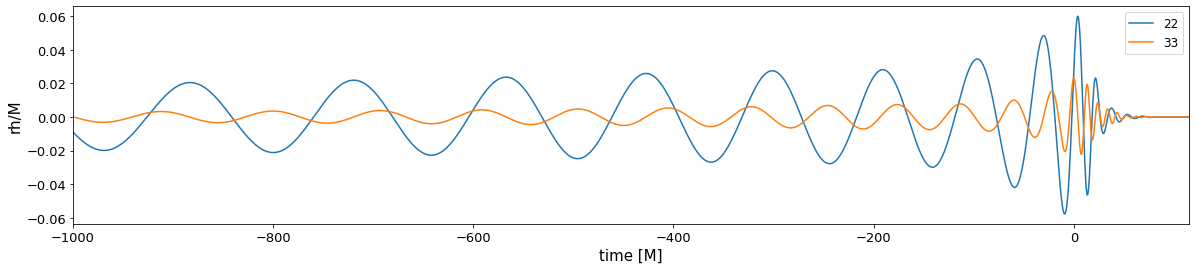

In [3]:
tsur, hsur = bhptsur.generate_surrogate(q=20.0, spin1=0.2, calibrated=False)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 2. Generate NR-calibrated waveforms in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


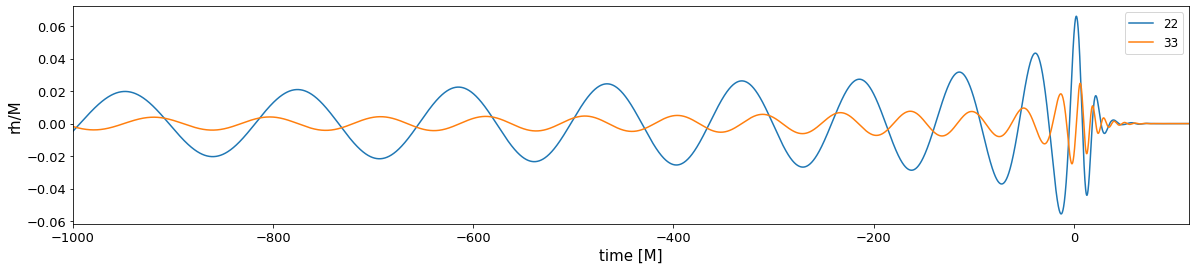

In [4]:
tsur, hsur = bhptsur.generate_surrogate(q=20)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 3. Generate (NR calibrated) waveform modes in Physical (SI) units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


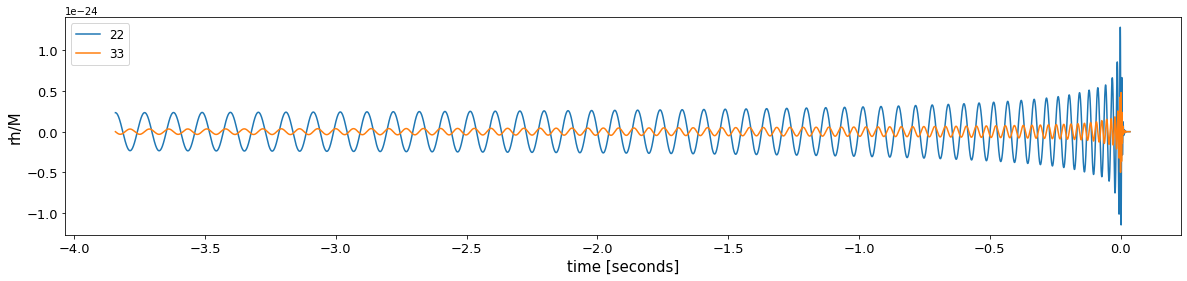

In [5]:
tsur, hsur = bhptsur.generate_surrogate(q=100, M_tot=60, dist_mpc=100)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [seconds]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 4. Generate (NR calibrated) waveform modes in Physical (SI) units evaluated at point on the sphere

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


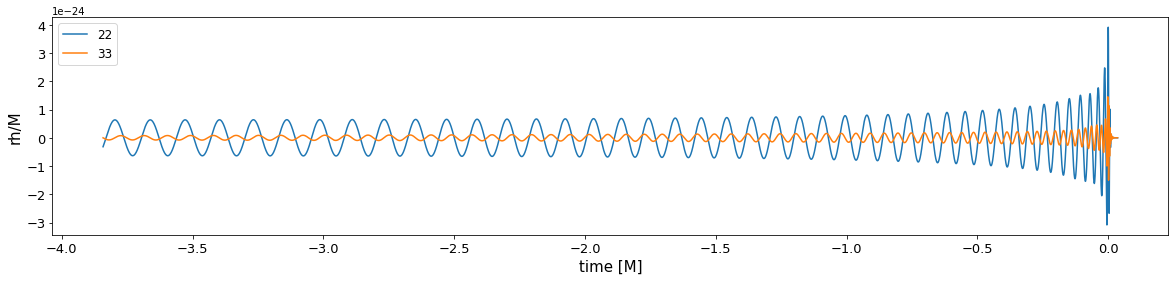

In [6]:
tsur, hsur = bhptsur.generate_surrogate(q=15, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

#### 4.1. Check for phase=0, inclination=0, 33 mode is zero

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


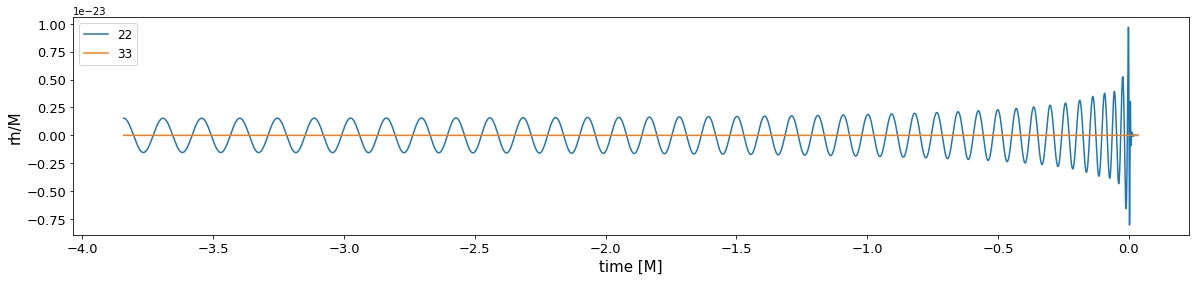

In [7]:
tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=0.0, inclination=0.0)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 5. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for a given set of modes

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


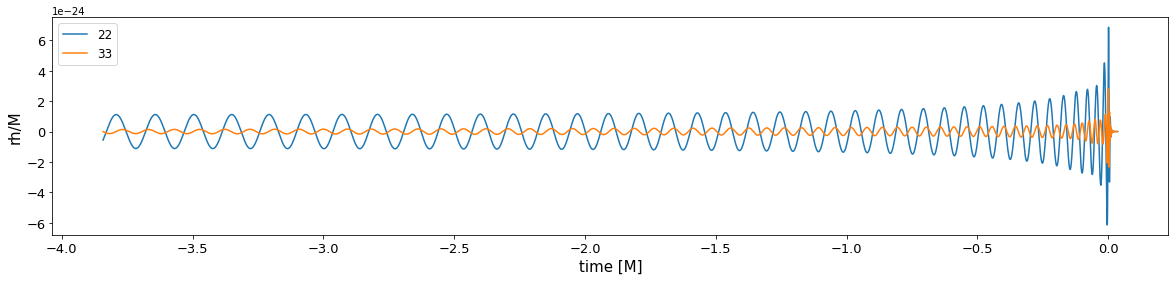

In [8]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 6. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3)])


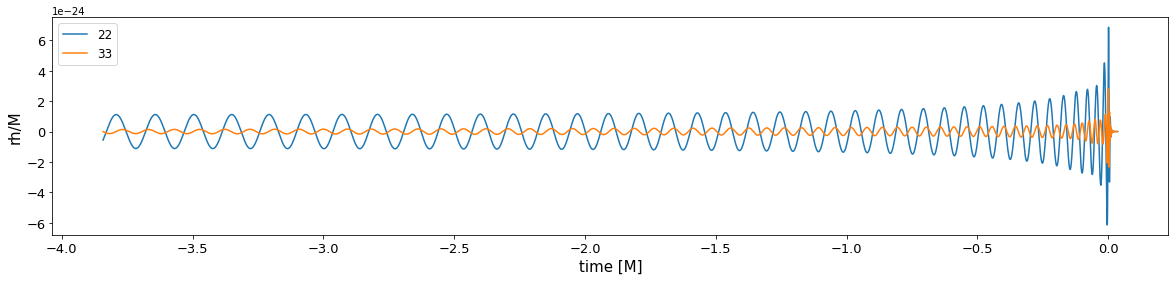

In [9]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 7. Generate mode-summed (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=5

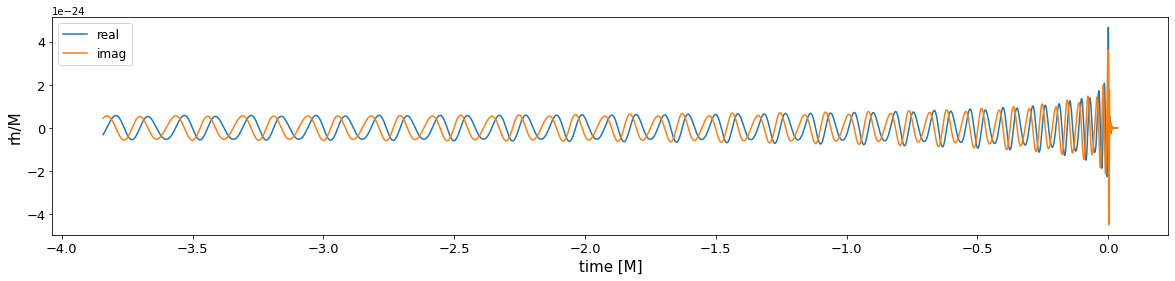

In [10]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=18, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3, mode_sum=True)


plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur), '-', label='real')
plt.plot(tsur, np.imag(hsur), '-', label='imag')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()